# Reconhecimento de escrita à mão

**Classificação de imagens (MNIST) usando um modelo de random forest**

***

## Importação dos pacotes necessários

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import pylab as pl
import random
from sklearn import ensemble

%matplotlib inline

***

## Carregar as imagens, transformá-las para escala de cinza e mostrar

<Figure size 432x288 with 0 Axes>

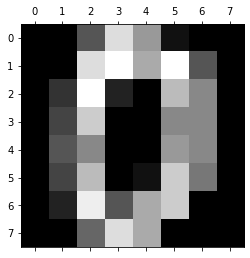

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [2]:
digits = load_digits()

pl.gray() 
pl.matshow(digits.images[0])
pl.show()

print(digits.images[0])

***

## Mostrar várias imagens na forma de grade

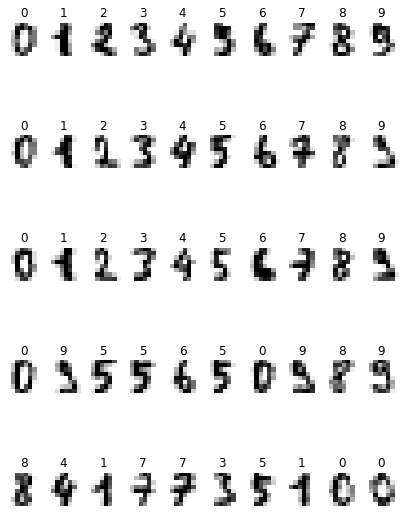

In [3]:
images_and_labels = list(zip(digits.images, digits.target))
plt.figure(figsize=(7,10))
for index, (image, label) in enumerate(images_and_labels[:50]):
    plt.subplot(5, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

***

## Preparar os conjuntos de treinamento e teste

+ **Preparar os dados e selecionar índices aleatórios para esses conjuntos**

In [15]:
x = digits.images.reshape((len(digits.images), -1))
y = digits.target

train_indices = random.sample(range(len(x)),int(len(x)/5)) # 20%
test_indices = [i for i in range(len(x)) if i not in train_indices] # 80%

+ **Separar as imagens dos rótulos**

In [16]:
# Imagens
train_images = [x[i] for i in train_indices]
test_images = [x[i] for i in test_indices]

# Rótulos
train_labels = [y[i] for i in train_indices]
test_labels = [y[i] for i in test_indices]

***

## Criar, treinar e avaliar o classificador

In [17]:
classifier = ensemble.RandomForestClassifier()
classifier.fit(train_images, train_labels)

score = classifier.score(test_images, test_labels)
print(f'Desempenho: {score}')

Desempenho: 0.9429763560500696


***

## Usar o classificador criado

In [7]:
def use(index):
    pl.gray() 
    pl.matshow(digits.images[index]) 
    pl.show() 
    print(f'Classificação: {classifier.predict(x[index].reshape(-1, 64))[0]}')
    print(f'Classe real: {y[index]}')

<Figure size 432x288 with 0 Axes>

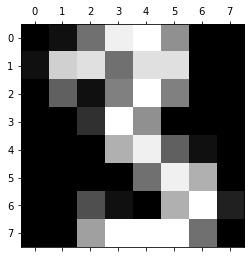

Classificação: 3
Classe real: 3


In [9]:
use(1248)